In [64]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from timeit import default_timer as timer
import random as random
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from scipy.linalg import sqrtm

##### 1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

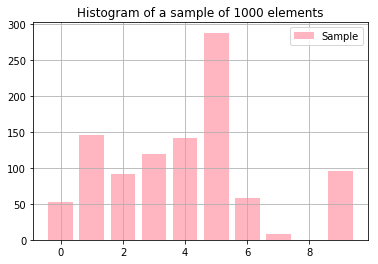

Program running time:   0.0033809999999903084


In [18]:
def f(ves, k):
    for i in range(10):
        if (k <= ves[i]):
            return i

ves = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
number = np.zeros(10)
ves = ves/ves.sum()
for i in range (1, 10):
    ves[i] += ves[i-1]

start = timer()
for i in range (1000):
    number[f(ves, random.random())] += 1
end = timer()

plt.bar(np.array([i for i in range(10)]), number , label = 'Sample', color = 'lightpink')
plt.title('Histogram of a sample of 1000 elements')
plt.legend()
plt.grid(True)
plt.show()
print("Program running time:  ", end - start)

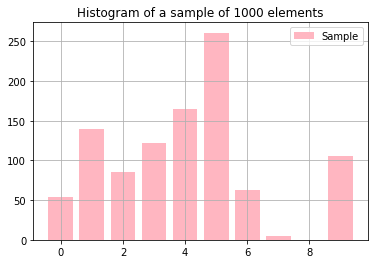

Program running time:   0.0047319999999899665


In [19]:
def f(c, ves, k):
    for i in range(10):
        if (k <= ves[i]):
            return c[i]

ves = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
number = np.zeros(10)
ves = ves/ves.sum()
c = np.argsort(ves)
ves.sort()
for i in range (1, 10):
    ves[i] += ves[i-1]

start = timer()
for i in range (1000):
    number[f(c, ves, random.random())] += 1
end = timer()

plt.bar(np.array([i for i in range(10)]), number , label = 'Sample', color = 'lightpink')
plt.title('Histogram of a sample of 1000 elements')
plt.legend()
plt.grid(True)
plt.show()
print("Program running time:  ", end - start)

##### 2.Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

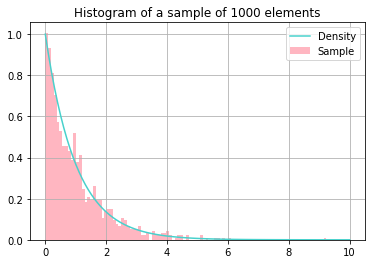

Program running time:   0.005440700000008292


In [20]:
start = timer()
number = np.array([-np.log(1 - np.random.rand()) for j in range(1000)])
end = timer()

plt.hist(number, density = True, label = 'Sample', color = 'lightpink', bins = 100)
plt.plot(np.linspace(0,10,100), stats.expon().pdf(np.linspace(0,10,100)), label = 'Density', color = 'mediumturquoise')
plt.title('Histogram of a sample of 1000 elements')
plt.legend()
plt.grid(True)
plt.show()

print("Program running time:  ", end - start)

##### 3.Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

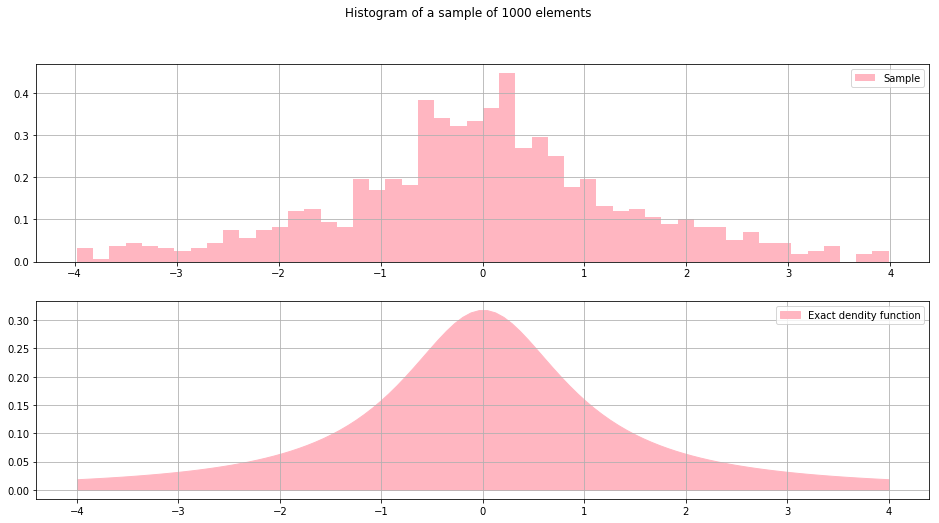

Program running time:   4.040659399999981


In [23]:
number = np.zeros(1000)

start = timer()
for i in range(1000):
    x = np.random.rand()*8 - 4
    y = np.random.rand()/2
    while (y > stats.cauchy().pdf(x)):
        x = np.random.rand()*8 - 4
        y = np.random.rand()/2
    number[i] = x
end = timer()

fig, axs = plt.subplots(2, 1, figsize=(16,8))
fig.suptitle('Histogram of a sample of 1000 elements')
axs[0].hist(number, density=True, label = 'Sample', color = 'lightpink', bins = 50)
axs[0].legend()
axs[0].grid(True)

dist = stats.cauchy()
x = np.linspace(-4, 4, 100)

axs[1].fill_between(x, 0, dist.pdf(x), label = 'Exact dendity function', color = 'lightpink')
axs[1].legend()
axs[1].grid(True)
plt.show()
print("Program running time:  ", end - start)

##### 4.Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

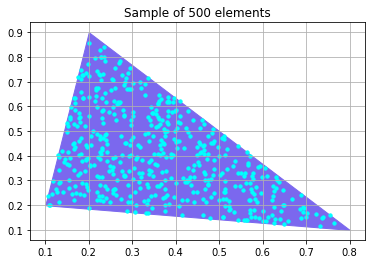

In [37]:
a0 = np.array([np.random.rand() for i in range(500)])
a1 = np.array([np.random.rand() for i in range(500)])

x = (1 + a0 + 7*a1)
y = (2 + 7*a0 - a1)

for i in range(500):
    if (y[i] > (-4/3)*x[i] + 35/3):
        x[i] = 10 - x[i]
        y[i] = 10 - y[i]
    
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon], color = 'mediumslateblue'))
plt.scatter(x/10, y/10, s=11. , color = 'aqua')
plt.title('Sample of 500 elements')
plt.grid(True)
plt.show()

##### 5.Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

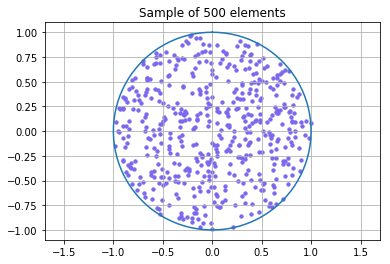

In [49]:
t = np.linspace(0, 2 * np.pi, 100)

phi = np.array([np.random.rand() for i in range(500)])*2*np.pi
r = np.sqrt([np.random.rand() for i in range(500)])

plt.scatter( r*np.cos(phi), r*np.sin(phi), s =11., color = 'mediumslateblue')
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.title('Sample of 500 elements')
plt.grid(True)
plt.show()

##### 6.Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

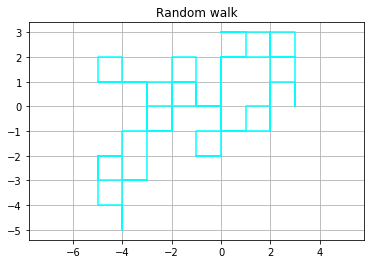

In [54]:
nols = np.zeros([2, 101])
w = np.array([np.random.randint(0,2) for i in range(50)])
ud = len(w[w == 0])*2
updowns=np.random.choice(np.arange(100), ud, replace = False) + 1
updowns.sort()
ups = np.random.choice(updowns, ud//2, replace = False)
ups.sort()
nols[1,ups] = 1
nols[1,updowns] = nols[1,updowns]*2 - 1
leftrights = np.arange(100)[nols[1,1:] == 0] + 1
lefts = np.random.choice(leftrights,50 - ud//2, replace = False)
nols[0,lefts] =- 1
nols[0,leftrights] = nols[0,leftrights]*2 + 1
for i in range(101):
    nols[0,-i-1] += nols[0,:-i-1].sum()
    nols[1,-i-1] += nols[1,:-i-1].sum()
    
plt.plot(nols[0],nols[1], color = 'aqua')
plt.axis('equal')
plt.title('Random walk')
plt.grid(True)
plt.show()

##### 7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

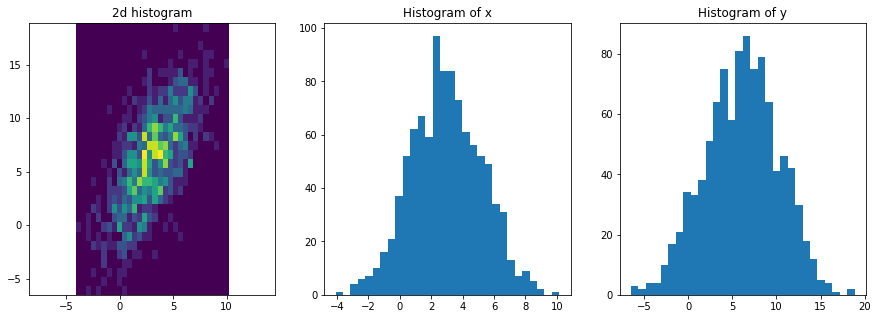

In [62]:
n = 1000
u1, u2 = np.random.rand(2, n) *2 -1

for i in range(n):
    while u1[i]*u1[i] + u2[i]*u2[i] > 1:
        u1[i], u2[i] = np.random.rand(2)*2 - 1
        
hoho = u1*u1 + u2*u2
tx = u1*np.sqrt(-2*np.log(hoho)/hoho)
ty = u2*np.sqrt(-2*np.log(hoho)/hoho)
x = tx * 2 + ty + 3
y = tx + ty * 4 + 6

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

##### 8.Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [63]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

In [78]:
a=np.zeros([9,10000])
for i in range(10000):
    a[:,i] = np.random.normal(0,1,9)
print((sqrtm(B).imag > 0).any())
print(abs(np.cov(np.matmul(C.real,a))-B) < 0.1)

True
[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]
